In [328]:
import random
import numpy as np
import matplotlib.pyplot as plt

Problema 3

(a) Viés.

In [329]:
np.random.normal(loc=5, size=100)

array([5.48195405, 3.91869656, 5.69369509, 3.78029363, 4.48758671,
       2.93245515, 3.99688479, 3.28551853, 4.70805625, 5.71844933,
       4.9637013 , 4.40021361, 4.40468792, 5.64490176, 4.81757795,
       5.90990234, 6.33397848, 4.26816364, 6.03459717, 6.52258902,
       5.89850997, 4.92576957, 5.26195219, 5.16861501, 3.50198889,
       6.58222034, 5.66140496, 1.75806357, 4.24836119, 5.30671064,
       6.16800671, 5.56030788, 4.92359723, 4.77031923, 2.99549895,
       5.60427661, 6.87633094, 7.46243589, 4.68735563, 5.06780082,
       4.70055452, 3.271857  , 6.6034062 , 3.68157638, 3.56263959,
       5.87401904, 5.4081788 , 3.00110059, 4.89228643, 7.1865259 ,
       6.02160297, 3.67426867, 6.82042202, 4.42087797, 5.85138114,
       4.9700103 , 5.3425331 , 4.68250208, 7.05543688, 3.28902907,
       4.03028215, 3.82498578, 4.13771341, 7.15224809, 5.56279071,
       6.11632371, 4.68450506, 5.67535929, 3.57693121, 5.83419986,
       6.62761784, 2.85141419, 6.77056938, 5.27848966, 5.35979

In [330]:
dists = [] 
for i in range(0, 200):
    dists.append(np.random.normal(size=100))

In [331]:
# Calculate the real theta
m, n = np.array(dists).shape
θ = sum(sum(dists)) / (m*n)

In [333]:
# Calculate the theta estimated
mat_vies = []
for i in range(1, 101):
    vies_results = []
    for j in range(1, 201):
        m = np.array(dists)[i, 0:j].shape[0]
        vies_emp = np.array(dists)[i, 0:j].sum() / m
        vies_results.append(vies_emp)
    mat_vies.append(vies_results)

IndexError: index 100 is out of bounds for axis 0 with size 100

In [304]:
vies_j = []

for i in range(0, 200):
    vies = 0
    m = np.array(mat_vies)[:, i].shape[0]
    for j in range (0, 100):
        vies_i = np.array(mat_vies)[j, i] - θ
        vies = vies + vies_i
    
    vies = vies/m
    vies_j.append(vies)

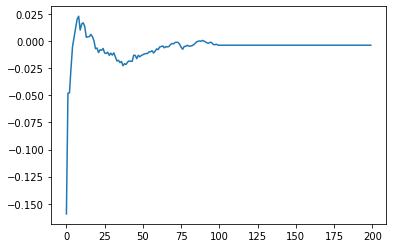

In [305]:
plt.plot(range(0,200), vies_j)

(a) MSE.

In [306]:
mse_j = []

for i in range(0, 200):
    mse = 0
    m = np.array(mat_vies)[:, i].shape[0]
    for j in range (0, 100):
        mse_i = (np.array(mat_vies)[j, i] - θ)**2
        mse = mse + mse_i
    
    mse = mse/m
    mse_j.append(mse)

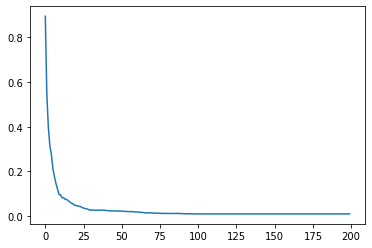

In [307]:
plt.plot(range(0,200), mse_j)

c)

A convergencia de um estimador pode ser definida como:

$lim_{n->\infty} \quad P\{\hat{\theta_n} - \theta\} < \epsilon = 1$

Calcula-se então a diferença, $\hat{\theta_n} - \theta$ para cada valor de n e para cada amostra.

In [308]:
np.array(dists)[0, 0:i]

array([ 0.92194617,  1.83112072, -0.14391429,  0.56149923,  0.54006861,
        0.67859823,  0.64204907, -0.34774968,  0.12337423,  0.19594065,
       -1.14742114, -1.49795076, -0.02020001, -0.14912534,  0.34831046,
        0.29598048, -0.43902882, -1.44512817,  1.51071298,  1.88793589,
        0.66398338,  0.07035384, -0.09269493,  0.40296193, -0.21166513,
        1.09640679,  0.57523165,  0.18611631,  0.378983  ,  0.10053326,
        0.65256003, -1.3344803 , -1.47274024,  1.33040696,  0.27361175,
       -0.46821102,  0.88396299,  0.10301185, -0.14797926, -1.02869514,
       -0.4151826 ,  0.06243387, -0.84271436, -1.10599055, -0.55989953,
        1.61066209,  1.08095468, -0.97398214,  0.43248201,  1.06506678,
       -0.43451641, -0.57033973, -0.08925731,  1.4013729 ,  1.24405337,
       -0.41690518, -3.07054608, -1.25922332, -0.97878072, -0.97275365,
        0.24282345, -1.25497351,  0.7690091 ,  0.65316046,  1.39761591,
       -0.5378628 , -1.04846192, -1.58843814,  0.67259415,  0.09

In [309]:
convergence_results = []
for i in range(1, len(dists[0])):
    θ_n = np.sum(np.array(dists)[0, 0:i])/ len(np.array(dists)[0, 0:i])
    convergence_results.append(θ_n - θ)

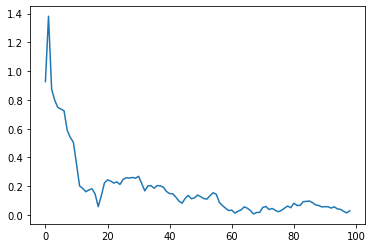

In [310]:
plt.plot(convergence_results)

d)

Intervalo de confianca - Considerando-se que a todas as subamostras se comportam como distribuições normais
pode-se ser definido um intervalo de confiança para cada amostra e avaliado quantas vezes os valores caem dentro
do intervalo

In [311]:
# Calcula-se primeiramento o desvio padrao (sigma^2)
σ = np.std(dists)

In [312]:
1.96* np.std(dists)

1.972591705282622

In [313]:
condidence_intervals_U = []
condidence_intervals_L = []
for x in dists:
    U = sum(x)/len(x) + (1.96*σ/np.sqrt(len(x)))
    L = sum(x)/len(x) - (1.96*σ/np.sqrt(len(x)))
    condidence_intervals_U.append(U)
    condidence_intervals_L.append(L)

In [318]:
k = 0
for i, x in enumerate(dists):
    for j in range(0, len(x)):
        if x[j] > condidence_intervals_U[i] or x[j] < condidence_intervals_L[i]:
            k += 1
print(k/20000)

0.84095


In [327]:
np.shape(dists)

(200, 100)

Problema 4

a)

In [323]:
dists = [] 
for i in range(0, 200):
    dists.append(np.random.normal(size=100))

10.0

In [ ]:
np.random.normal